## Sentiment Analysis Homework

Flipkart is a popular Indian e-commerce platform that competes with Amazon. Use sentiment analysis of product reviews sold on this e-commerce platforms. 

In [67]:
!pip install snscrape

In [68]:
!pip install WordCloud

In [69]:
!pip install textblob 

In [70]:
# Load Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [71]:
# Load data

Sentiment = pd.read_csv('flipkart.csv')

In [72]:
# Inspect data - first five rows

Sentiment.info()
Sentiment.describe
Sentiment.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  2304 non-null   int64 
 1   Unnamed: 0    2304 non-null   int64 
 2   Review        2304 non-null   object
 3   Rating        2304 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.1+ KB


,Unnamed: 0.1,Unnamed: 0,Review,Rating
0,0,0,Best under 60k Great performanceI got it for a...,5
1,1,1,Good perfomence...,5
2,2,2,Great performance but usually it has also that...,5
3,3,3,My wife is so happy and best product 👌🏻😘,5
4,4,4,"Light weight laptop with new amazing features,...",5


In [73]:
# Check for missing data (hint:  use isnull().sum())
# Answer the question:  is any data missing?

reduced_df=Sentiment.dropna()
reduced_df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Review          0
Rating          0
dtype: int64

In [82]:
# Data prep
# 
# 1. Tokenize (with SnowballStemmber)
# 2. Clean data (i.e., remove extraneous symbols from reviews)

import nltk
import re
nltk.download('stopwords')


stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

# Apply the function to the review data

Sentiment['Rating'] = Sentiment['Review'].apply(clean) #apply cleanTweet function to the tweet
Sentiment.head() #compares original tweets with cleaned Tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91958\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0.1,Unnamed: 0,Review,Rating
0,0,0,Best under 60k Great performanceI got it for a...,best great performancei got around backup bi...
1,1,1,Good perfomence...,good perfom
2,2,2,Great performance but usually it has also that...,great perform usual also game laptop issu batt...
3,3,3,My wife is so happy and best product 👌🏻😘,wife happi best product 👌🏻😘
4,4,4,"Light weight laptop with new amazing features,...",light weight laptop new amaz featur batteri li...


In [83]:
Sentiment.to_csv('flipkart.csv') #write dataframe into csv file
savedSenti = pd.read_csv('flipkart.csv',index_col=0) #reads csv file

In [86]:
# Analyze sentiments - derive subjectivity and polarity of reviews, using a function

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

savedSenti['Subjectivity'] = savedSenti['Rating'].apply(getSubjectivity)
savedSenti['Polarity'] = savedSenti['Rating'].apply(getPolarity)
savedSenti.drop('Review', axis=1).head() 

,Unnamed: 0.1,Unnamed: 0,Rating,Polarity,Subjectivity
0,0,0,best great performancei got around backup bi...,0.451852,0.479630
1,1,1,good perfom,0.700000,0.600000
2,2,2,great perform usual also game laptop issu batt...,-0.062500,0.450000
3,3,3,wife happi best product 👌🏻😘,1.000000,0.300000
4,4,4,light weight laptop new amaz featur batteri li...,0.268182,0.577273


In [89]:
# Inspect updated data frame

savedSenti.info()
savedSenti.describe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2304 entries, 0 to 2303
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  2304 non-null   int64  
 1   Unnamed: 0    2304 non-null   int64  
 2   Review        2304 non-null   object 
 3   Rating        2304 non-null   object 
 4   Polarity      2304 non-null   float64
 5   Subjectivity  2304 non-null   float64
 6   Analysis      2304 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 144.0+ KB


<bound method NDFrame.describe of       Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1                1           1   
2                2           2   
3                3           3   
4                4           4   
...            ...         ...   
2299          2299        2299   
2300          2300        2300   
2301          2301        2301   
2302          2302        2302   
2303          2303        2303   

                                                 Review  \
0     Best under 60k Great performanceI got it for a...   
1                                    Good perfomence...   
2     Great performance but usually it has also that...   
3              My wife is so happy and best product 👌🏻😘   
4     Light weight laptop with new amazing features,...   
...                                                 ...   
2299  Great display, accurate colours at this price ...   
2300  Superb monitor first brought 1 used for 2 mont...   
2301                      

In [87]:
#create a function to check negative, neutral and positive analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedSenti['Analysis'] = savedSenti['Polarity'].apply(getAnalysis)

savedSenti.head()

,Unnamed: 0.1,Unnamed: 0,Review,Rating,Polarity,Subjectivity,Analysis
0,0,0,Best under 60k Great performanceI got it for a...,best great performancei got around backup bi...,0.451852,0.479630,Positive
1,1,1,Good perfomence...,good perfom,0.700000,0.600000,Positive
2,2,2,Great performance but usually it has also that...,great perform usual also game laptop issu batt...,-0.062500,0.450000,Negative
3,3,3,My wife is so happy and best product 👌🏻😘,wife happi best product 👌🏻😘,1.000000,0.300000,Positive
4,4,4,"Light weight laptop with new amazing features,...",light weight laptop new amaz featur batteri li...,0.268182,0.577273,Positive


In [102]:
# Show sentiment frequency (i.e., counts of 'positive', 'negative', and 'neutral' sentiment)

savedSenti['Analysis'].value_counts() 

Positive    1965
Neutral      188
Negative     151
Name: Analysis, dtype: int64

In [103]:
# Shows the ratings counts

savedSenti['Rating'].value_counts() #shows the counts of Ratings' polarity

good                                                                                                                                                                                                                                                 74
nice                                                                                                                                                                                                                                                 43
nice product                                                                                                                                                                                                                                         32
good product                                                                                                                                                                                                                                         14
super   

Text(0.5, 1.0, 'Distribution of polarity')

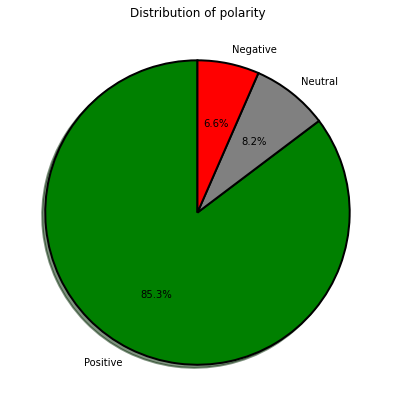

In [97]:
# Create a pie chart to show percentage distribution of rating
# Pick 5 colors of your own choosing
# Remove the 'explode' option
# Answer the question:  which rating is the most common?

fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red', 'blue', 'pink')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedSenti['Analysis'].value_counts()

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, label='')
plt.title('Distribution of polarity')

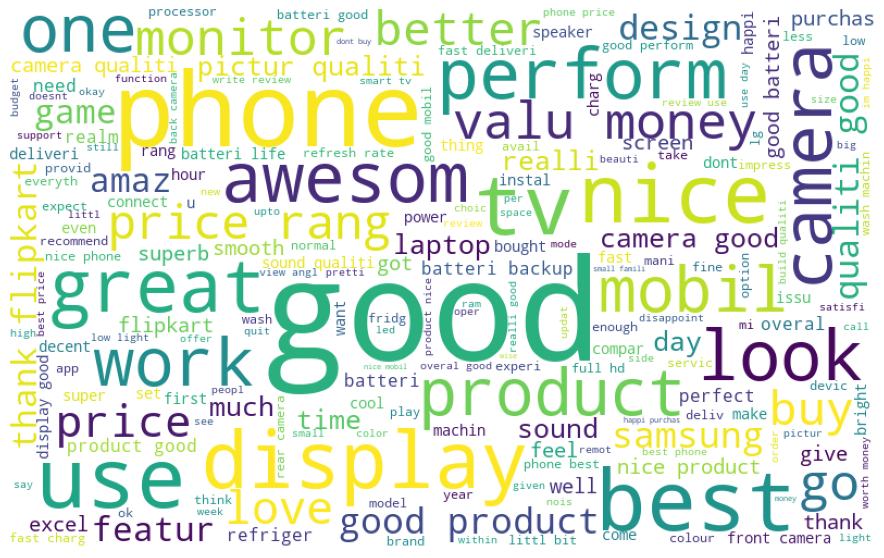

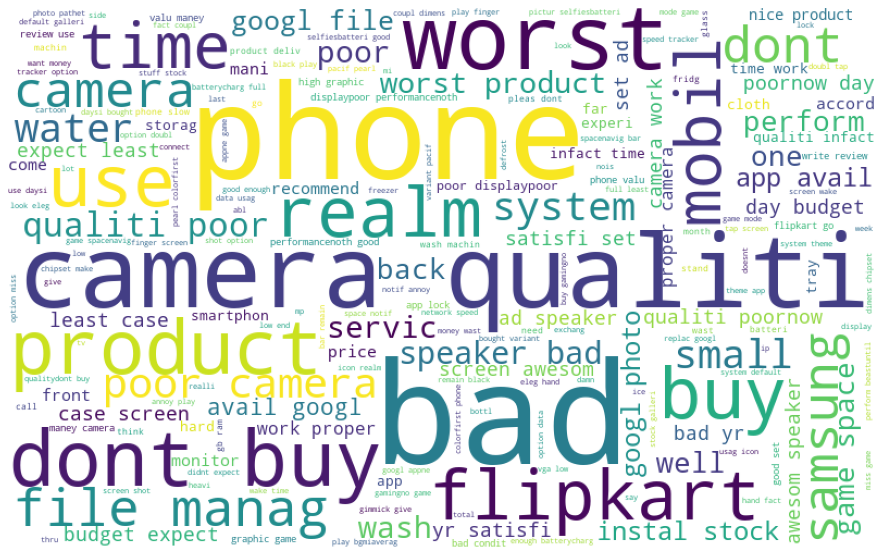

In [101]:
# Generate a wordcloud of the reviews
# What are the most common words?

def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
    
#wordcloud for positive ratings
posRatings = savedSenti.loc[savedSenti['Analysis']=='Positive', 'Rating']
create_wordcloud(posRatings)

#wordcloud for negative tweets
negRatings = savedSenti.loc[savedSenti['Analysis']=='Negative', 'Rating']
create_wordcloud(negRatings)